In [1]:
from super_resolution.src.sen2venus_dataset import S2VSite

In [3]:
site = S2VSite(
    site_name="FGMANAUS",
    bands="rgbnir",
    download_dir="C:/Users/Mitch/stat3007_data/",
    device="cpu",
)
print(f"{len(site)} patches")

100.0%


516 patches


In [57]:
from torch.nn.functional import normalize, interpolate
from torcheval.metrics.functional import peak_signal_noise_ratio

x, y = site[0]
x = x[:3, :, :].unsqueeze(0)
y = y[:3, :, :].unsqueeze(0)

interpolated_x = interpolate(x, size=(256, 256), mode="bicubic")
interpolated_psnr = peak_signal_noise_ratio(interpolated_x, y)

In [49]:
import matplotlib.pyplot as plt
import math


def plot_gallery(images, titles=None, xscale=1.5, yscale=1.5, nrow=1, output=None):
    ncol = math.ceil(len(images) / nrow)

    plt.figure(figsize=(xscale * ncol, yscale * nrow))

    for i in range(nrow * ncol):
        plt.subplot(nrow, ncol, i + 1)
        if i < len(images):
            if len(images[i].shape) == 2:
                plt.imshow(images[i], cmap="gray")
            else:
                plt.imshow(images[i])
            if titles is not None:
                # use size and y to adjust font size and position of title
                plt.title(titles[i], size=10, y=1)
        plt.xticks(())
        plt.yticks(())

    plt.tight_layout()

    if output is not None:
        plt.savefig(output)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


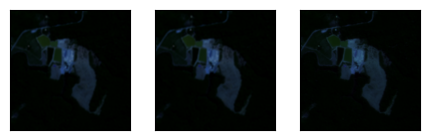

In [55]:
plot_gallery(
    [
        x.squeeze(0).permute((1, 2, 0)),
        interpolated_x.squeeze(0).permute((1, 2, 0)),
        y.squeeze(0).permute((1, 2, 0)),
    ]
)